# Air Quality Data Exploratory Analysis

In [1]:
# The following code is copied from the UCI Machine Learning Repository website to read in the data as a DataFrame

#!pip install ucimlrepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets   # target variable is benzene which is in the features df
  
# metadata 
print(air_quality.metadata) 
  
# variable information 
print(air_quality.variables) 


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

Missing value readings above are not true since missing values were actually coded with -200

In [2]:
# Renaming variables and reorganizing them to be more clear in analysis

# rename columns
X_df = X.rename(columns={"CO(GT)":"CO", "PT08.S1(CO)":"CO_exp", "NMHC(GT)":"NMHC", "C6H6(GT)":"C6H6_benzene", "PT08.S2(NMHC)":"NMHC_exp", 
          "NOx(GT)":"NOx", "PT08.S3(NOx)":"NOx_exp", "NO2(GT)":"NO2", "PT08.S4(NO2)":"NO2_exp", "PT08.S5(O3)":"O3_exp"})
# Convert date and time columns to one datetime dtype column 
datetime = X_df["Date"] + " " + X_df["Time"]
X_df["Datetime"] = pd.to_datetime(datetime, format="mixed")
X_df.drop(["Date", "Time"], axis=1, inplace=True)

# Replace all instances of -200 with NaN
X_df.replace(-200, np.nan, inplace=True)

# move benzene to the end
benzene = X_df["C6H6_benzene"]
X_df.drop(["C6H6_benzene"], axis=1, inplace=True)
X_df["C6H6_benzene"] = benzene

# print dataset
X_df.head()

CO  CO_exp   NMHC  NMHC_exp    NOx  NOx_exp    NO2  NO2_exp  O3_exp     T  \
0  2.6  1360.0  150.0    1046.0  166.0   1056.0  113.0   1692.0  1268.0  13.6   
1  2.0  1292.0  112.0     955.0  103.0   1174.0   92.0   1559.0   972.0  13.3   
2  2.2  1402.0   88.0     939.0  131.0   1140.0  114.0   1555.0  1074.0  11.9   
3  2.2  1376.0   80.0     948.0  172.0   1092.0  122.0   1584.0  1203.0  11.0   
4  1.6  1272.0   51.0     836.0  131.0   1205.0  116.0   1490.0  1110.0  11.2   

     RH      AH            Datetime  C6H6_benzene  
0  48.9  0.7578 2004-03-10 18:00:00          11.9  
1  47.7  0.7255 2004-03-10 19:00:00           9.4  
2  54.0  0.7502 2004-03-10 20:00:00           9.0  
3  60.0  0.7867 2004-03-10 21:00:00           9.2  
4  59.6  0.7888 2004-03-10 22:00:00           6.5

In [3]:
X_df.dtypes

CO                     float64
CO_exp                 float64
NMHC                   float64
NMHC_exp               float64
NOx                    float64
NOx_exp                float64
NO2                    float64
NO2_exp                float64
O3_exp                 float64
T                      float64
RH                     float64
AH                     float64
Datetime        datetime64[ns]
C6H6_benzene           float64
dtype: object

## Summary statistics of all numeric variables

In [4]:
X_df.describe().T

count                 mean                  min  \
CO            7674.0              2.15275                  0.1   
CO_exp        8991.0          1099.833166                647.0   
NMHC           914.0           218.811816                  7.0   
NMHC_exp      8991.0           939.153376                383.0   
NOx           7718.0           246.896735                  2.0   
NOx_exp       8991.0           835.493605                322.0   
NO2           7715.0           113.091251                  2.0   
NO2_exp       8991.0          1456.264598                551.0   
O3_exp        8991.0          1022.906128                221.0   
T             8991.0            18.317829                 -1.9   
RH            8991.0            49.234201                  9.2   
AH            8991.0              1.02553               0.1847   
Datetime        9357  2004-09-21 16:00:00  2004-03-10 18:00:00   
C6H6_benzene  8991.0            10.083105                  0.1   

                              25%                  50%                  75%  \
CO                            1.1                  1.8                  2.9   
CO_exp                      937.0               1063.0               1231.0   
NMHC                         67.0                150.0                297.0   
NMHC_exp                    734.5                909.0               1116.0   
NOx                          98.0                180.0                326.0   
NOx_exp                     658.0                806.0                969.5   
NO2                          78.0                109.0                142.0   
NO2_exp                    1227.0               1463.0               1674.0   
O3_exp                      731.5                963.0               1273.5   
T                            11.8                 17.8                 24.4   
RH                           35.8                 49.6                 62.5   
AH                         0.7368               0.9954               1.3137   
Datetime      2004-06-16 05:00:00  2004-09-21 16:00:00  2004-12-28 03:00:00   
C6H6_benzene                  4.4                  8.2                 14.0   

                              max         std  
CO                           11.9    1.453252  
CO_exp                     2040.0  217.080037  
NMHC                       1189.0  204.459921  
NMHC_exp                   2214.0  266.831429  
NOx                        1479.0  212.979168  
NOx_exp                    2683.0   256.81732  
NO2                         340.0   48.370108  
NO2_exp                    2775.0  346.206794  
O3_exp                     2523.0  398.484288  
T                            44.6    8.832116  
RH                           88.7   17.316892  
AH                          2.231    0.403813  
Datetime      2005-04-04 14:00:00         NaN  
C6H6_benzene                 63.7     7.44982

In [5]:
len(X_df)

9357

## Correlation of all numerical variables

In [6]:
X_df.drop(["Datetime"], axis=1, inplace=False).corr()

CO    CO_exp      NMHC  NMHC_exp       NOx   NOx_exp  \
CO            1.000000  0.879288  0.889734  0.915514  0.795028 -0.703446   
CO_exp        0.879288  1.000000  0.790670  0.892964  0.713654 -0.771938   
NMHC          0.889734  0.790670  1.000000  0.877696  0.812685 -0.771135   
NMHC_exp      0.915514  0.892964  0.877696  1.000000  0.704435 -0.796703   
NOx           0.795028  0.713654  0.812685  0.704435  1.000000 -0.655707   
NOx_exp      -0.703446 -0.771938 -0.771135 -0.796703 -0.655707  1.000000   
NO2           0.683343  0.641529  0.731193  0.646245  0.763111 -0.652083   
NO2_exp       0.630703  0.682881  0.853267  0.777254  0.233731 -0.538468   
O3_exp        0.854182  0.899324  0.766723  0.880578  0.787046 -0.796569   
T             0.022109  0.048627  0.391587  0.241373 -0.269683 -0.145112   
RH            0.048890  0.114606 -0.191454 -0.090380  0.221032 -0.056740   
AH            0.048556  0.135324  0.269738  0.186933 -0.149323 -0.232017   
C6H6_benzene  0.931078  0.883795  0.902559  0.981950  0.718839 -0.735744   

                   NO2   NO2_exp    O3_exp         T        RH        AH  \
CO            0.683343  0.630703  0.854182  0.022109  0.048890  0.048556   
CO_exp        0.641529  0.682881  0.899324  0.048627  0.114606  0.135324   
NMHC          0.731193  0.853267  0.766723  0.391587 -0.191454  0.269738   
NMHC_exp      0.646245  0.777254  0.880578  0.241373 -0.090380  0.186933   
NOx           0.763111  0.233731  0.787046 -0.269683  0.221032 -0.149323   
NOx_exp      -0.652083 -0.538468 -0.796569 -0.145112 -0.056740 -0.232017   
NO2           1.000000  0.157360  0.708128 -0.186533 -0.091759 -0.335022   
NO2_exp       0.157360  1.000000  0.591144  0.561270 -0.032188  0.629641   
O3_exp        0.708128  0.591144  1.000000 -0.027172  0.124956  0.070751   
T            -0.186533  0.561270 -0.027172  1.000000 -0.578621  0.656397   
RH           -0.091759 -0.032188  0.124956 -0.578621  1.000000  0.167971   
AH           -0.335022  0.629641  0.070751  0.656397  0.167971  1.000000   
C6H6_benzene  0.614474  0.765731  0.865689  0.198956 -0.061681  0.167972   

              C6H6_benzene  
CO                0.931078  
CO_exp            0.883795  
NMHC              0.902559  
NMHC_exp          0.981950  
NOx               0.718839  
NOx_exp          -0.735744  
NO2               0.614474  
NO2_exp           0.765731  
O3_exp            0.865689  
T                 0.198956  
RH               -0.061681  
AH                0.167972  
C6H6_benzene      1.000000

<Axes: >

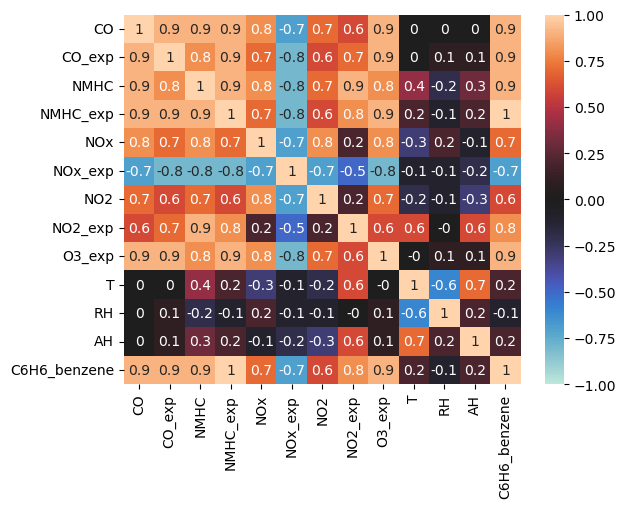

In [7]:
sns.heatmap(X_df.drop(["Datetime"], axis=1, inplace=False).corr().round(1), 
            vmin=-1,
            vmax=1,
            center=0,
            annot=True)

## Pair plots of all numerical variables

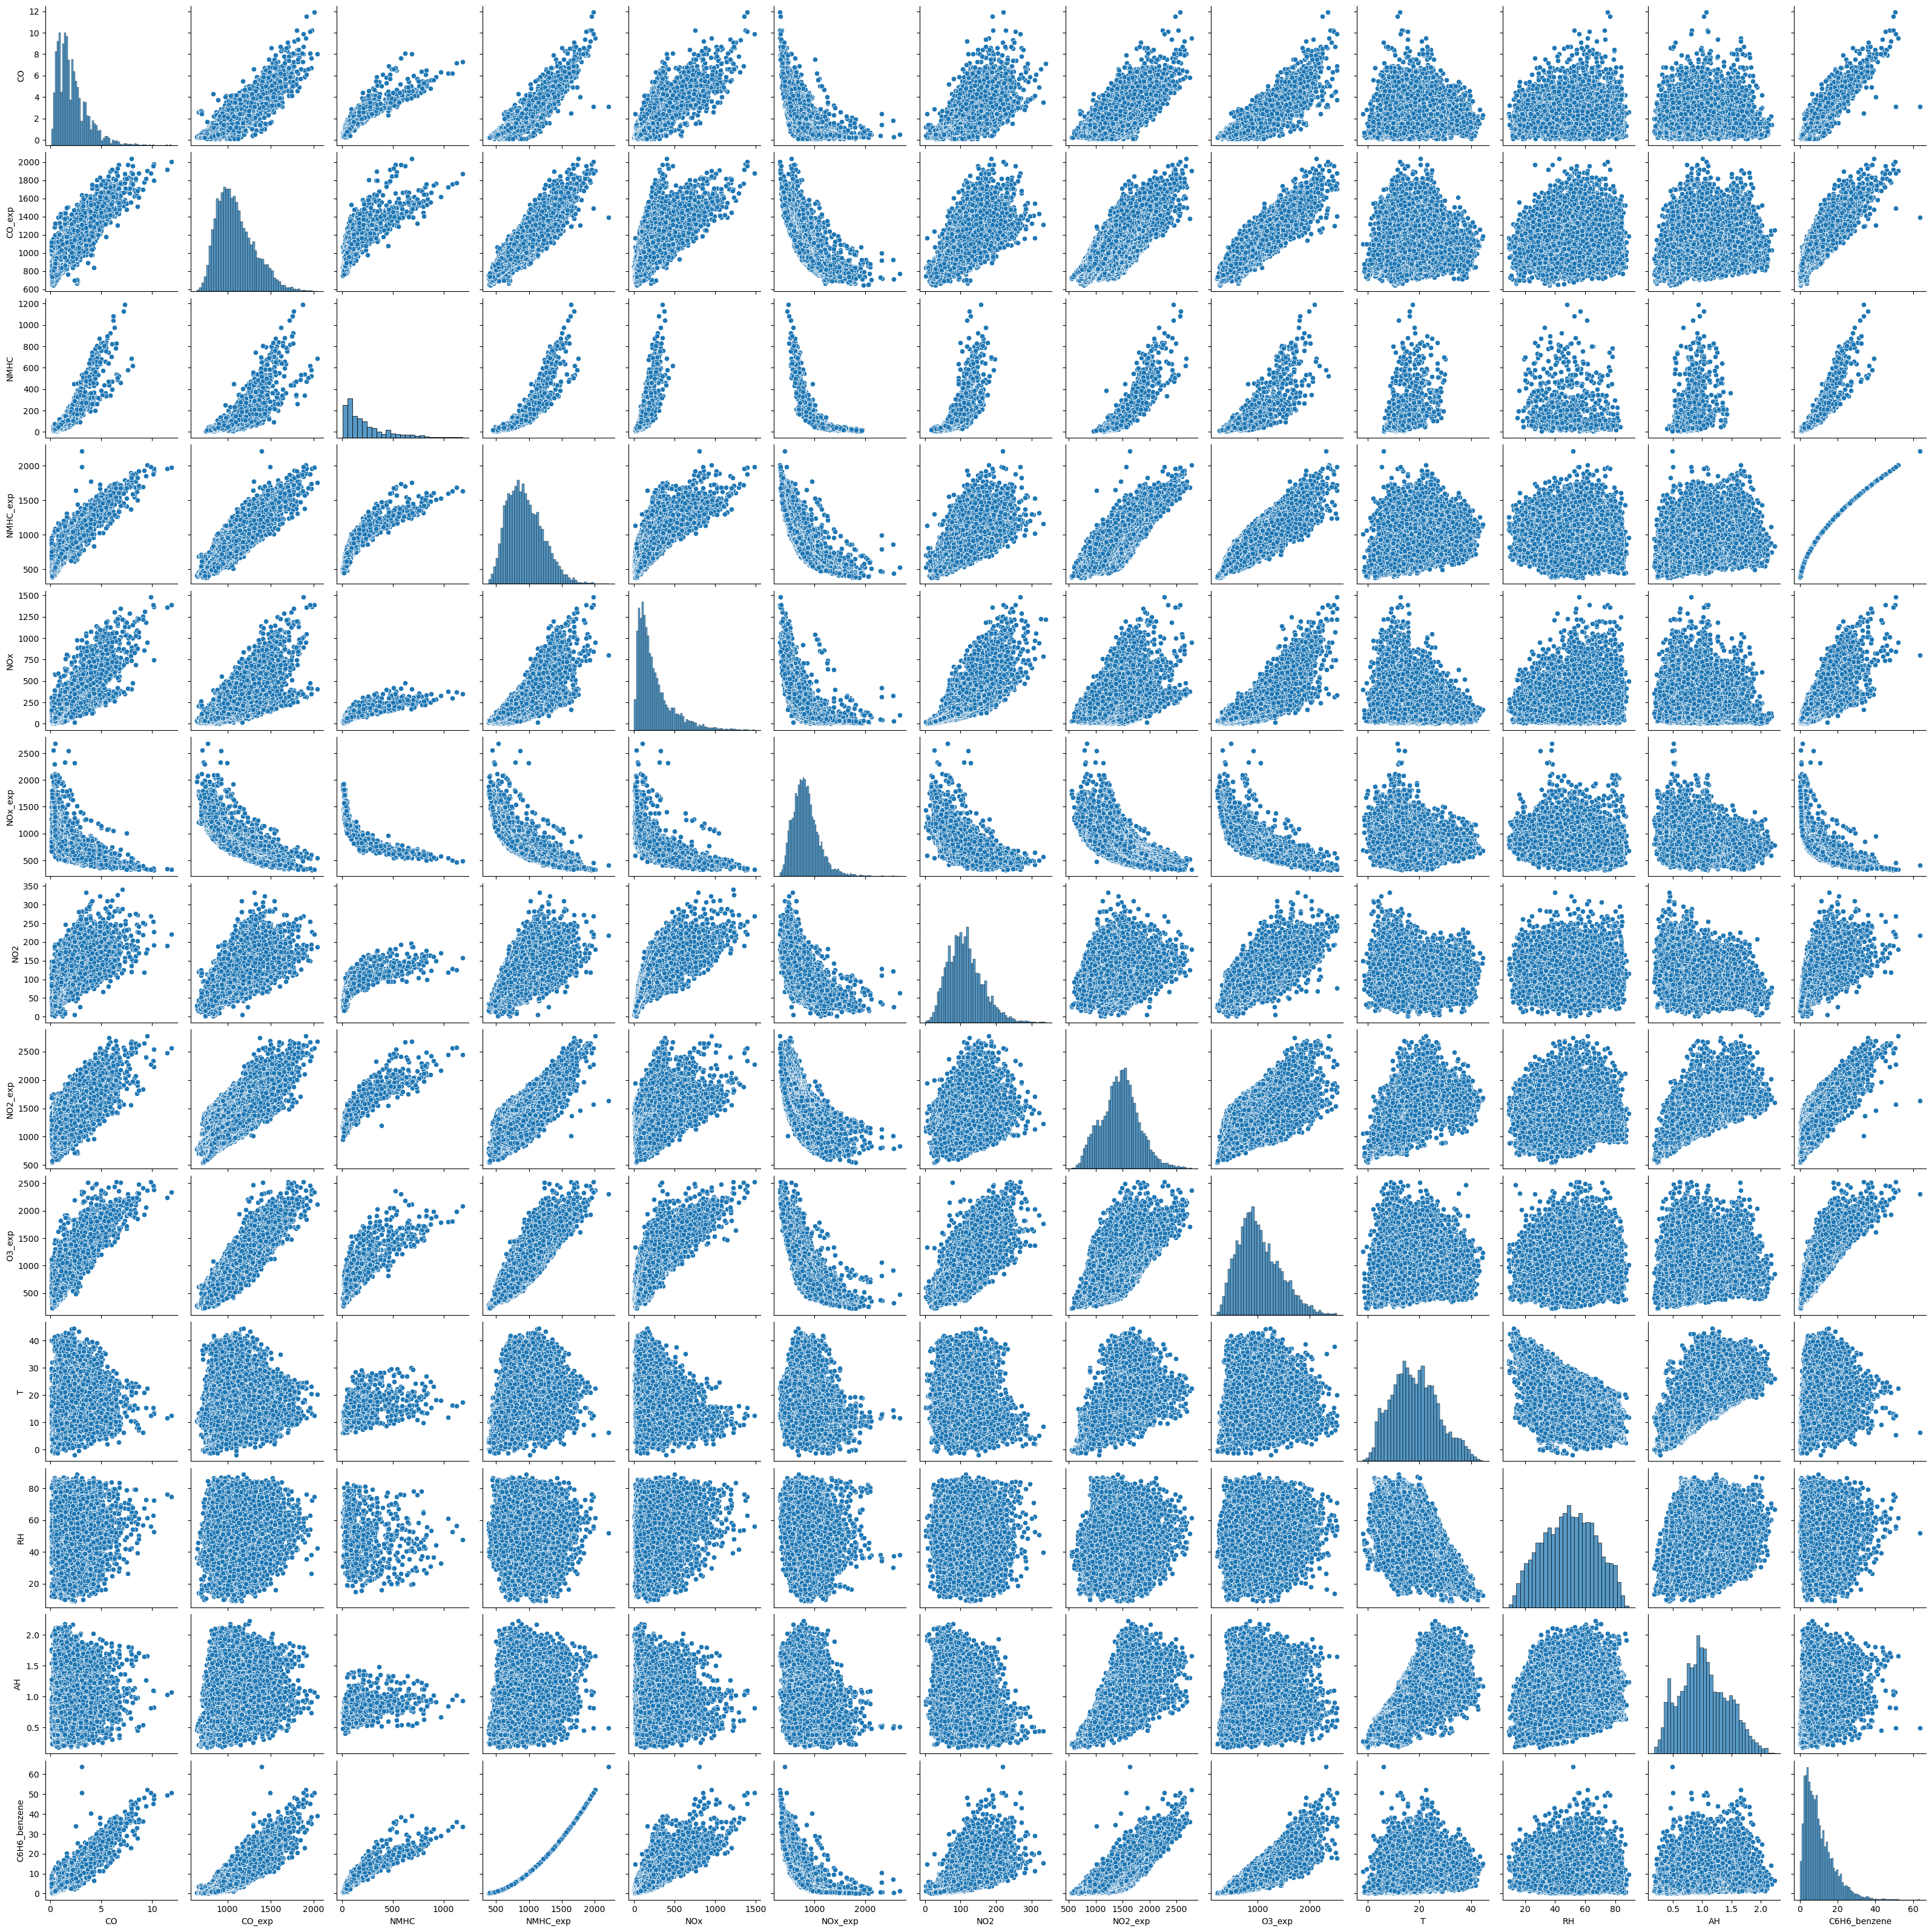

In [8]:
sns.pairplot(data=X_df)

## Several unhelpful plots of a couple variables over time

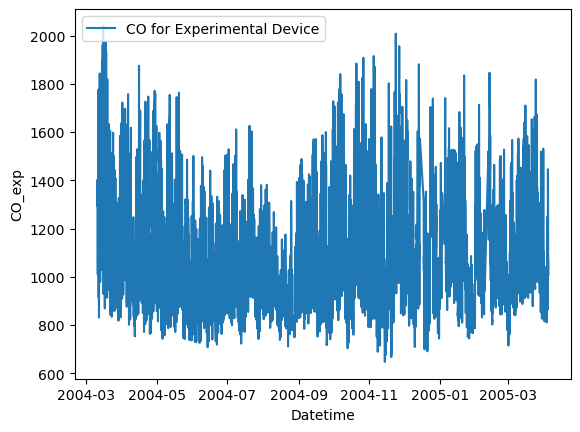

In [9]:
sns.lineplot(data=X_df, x="Datetime", y="CO_exp", label="CO for Experimental Device");

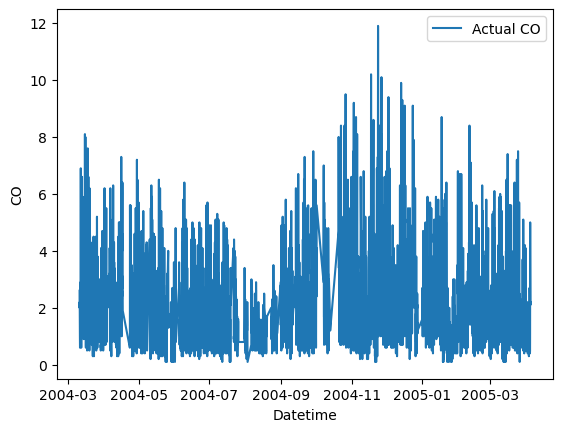

In [10]:
sns.lineplot(data=X_df, x="Datetime", y="CO", label="Actual CO");

### Tried standardizing the data to see if that made the experimental and conventional plots close in shape

In [11]:
X_std = pd.DataFrame(StandardScaler().fit_transform(X_df.drop("Datetime", axis=1)),
                    columns=["CO", "CO_exp", "NMHC", "NMHC_exp", "NOx", "NOx_exp", 
                             "NO2", "NO2_exp", "O3_exp", "T", "RH", "AH", "C6H6_benzene"])
X_std["Datetime"] = X_df["Datetime"]
X_std.head()

CO    CO_exp      NMHC  NMHC_exp       NOx   NOx_exp       NO2  \
0  0.307778  1.198550 -0.336738  0.400450 -0.379859  0.858660 -0.001887   
1 -0.105116  0.885284 -0.522696  0.059391 -0.675681  1.318156 -0.436067   
2  0.032516  1.392038 -0.640142 -0.000575 -0.544205  1.185759  0.018789   
3  0.032516  1.272260 -0.679291  0.033156 -0.351685  0.998845  0.184191   
4 -0.380378  0.793147 -0.821206 -0.386608 -0.544205  1.438871  0.060139   

    NO2_exp    O3_exp         T        RH        AH  C6H6_benzene  \
0  0.680947  0.615100 -0.534197 -0.019300 -0.663043      0.243898   
1  0.296762 -0.127757 -0.568166 -0.088601 -0.743035     -0.091699   
2  0.285208  0.128228 -0.726687  0.275226 -0.681865     -0.145395   
3  0.368977  0.451972 -0.828594  0.621728 -0.591471     -0.118547   
4  0.097448  0.218575 -0.805948  0.598628 -0.586271     -0.480992   

             Datetime  
0 2004-03-10 18:00:00  
1 2004-03-10 19:00:00  
2 2004-03-10 20:00:00  
3 2004-03-10 21:00:00  
4 2004-03-10 22:00:00

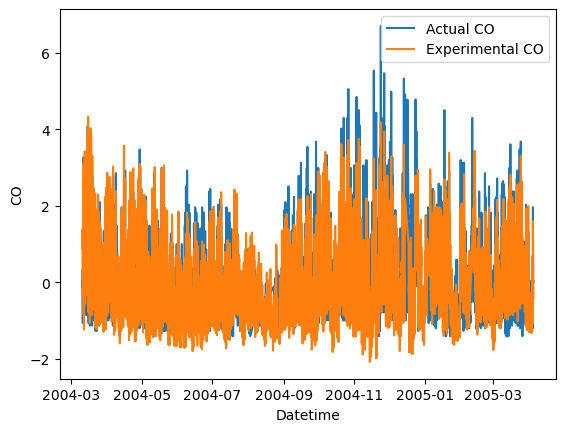

In [12]:
sns.lineplot(data=X_std, x="Datetime", y="CO", label="Actual CO")
sns.lineplot(data=X_std, x="Datetime", y="CO_exp", label="Experimental CO");

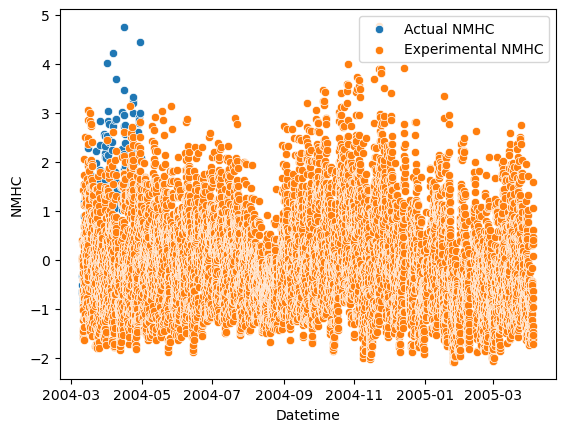

In [13]:
# Somehow the plots have only gotten worse

sns.scatterplot(data=X_std, x="Datetime", y="NMHC", label="Actual NMHC")
sns.scatterplot(data=X_std, x="Datetime", y="NMHC_exp", label="Experimental NMHC");

## Graphs with 2 day rolling averages

In [14]:
# Make rolling average columns
rolling_avg_length = 48

X_df["CO_roll_avg"] = X_df["CO"].rolling(rolling_avg_length).mean()
X_df["CO_exp_roll_avg"] = X_df["CO_exp"].rolling(rolling_avg_length).mean()
X_df["NMHC_roll_avg"] = X_df["NMHC"].rolling(rolling_avg_length).mean()
X_df["NMHC_exp_roll_avg"] = X_df["NMHC_exp"].rolling(rolling_avg_length).mean()
X_df["NOx_roll_avg"] = X_df["NOx"].rolling(rolling_avg_length).mean()
X_df["NOx_exp_roll_avg"] = X_df["NOx_exp"].rolling(rolling_avg_length).mean()
X_df["NO2_roll_avg"] = X_df["NO2"].rolling(rolling_avg_length).mean()
X_df["NO2_exp_roll_avg"] = X_df["NO2_exp"].rolling(rolling_avg_length).mean()
X_df["O3_exp_roll_avg"] = X_df["O3_exp"].rolling(rolling_avg_length).mean()
X_df["T_roll_avg"] = X_df["T"].rolling(rolling_avg_length).mean()
X_df["RH_roll_avg"] = X_df["RH"].rolling(rolling_avg_length).mean()
X_df["AH_roll_avg"] = X_df["AH"].rolling(rolling_avg_length).mean()
X_df["C6H6_benzene_roll_avg"] = X_df["C6H6_benzene"].rolling(rolling_avg_length).mean()

In [15]:
X_df.head()

CO  CO_exp   NMHC  NMHC_exp    NOx  NOx_exp    NO2  NO2_exp  O3_exp     T  \
0  2.6  1360.0  150.0    1046.0  166.0   1056.0  113.0   1692.0  1268.0  13.6   
1  2.0  1292.0  112.0     955.0  103.0   1174.0   92.0   1559.0   972.0  13.3   
2  2.2  1402.0   88.0     939.0  131.0   1140.0  114.0   1555.0  1074.0  11.9   
3  2.2  1376.0   80.0     948.0  172.0   1092.0  122.0   1584.0  1203.0  11.0   
4  1.6  1272.0   51.0     836.0  131.0   1205.0  116.0   1490.0  1110.0  11.2   

   ...  NMHC_exp_roll_avg  NOx_roll_avg NOx_exp_roll_avg  NO2_roll_avg  \
0  ...                NaN           NaN              NaN           NaN   
1  ...                NaN           NaN              NaN           NaN   
2  ...                NaN           NaN              NaN           NaN   
3  ...                NaN           NaN              NaN           NaN   
4  ...                NaN           NaN              NaN           NaN   

   NO2_exp_roll_avg  O3_exp_roll_avg  T_roll_avg  RH_roll_avg  AH_roll_avg  \
0               NaN              NaN         NaN          NaN          NaN   
1               NaN              NaN         NaN          NaN          NaN   
2               NaN              NaN         NaN          NaN          NaN   
3               NaN              NaN         NaN          NaN          NaN   
4               NaN              NaN         NaN          NaN          NaN   

   C6H6_benzene_roll_avg  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 27 columns]

<Axes: xlabel='Datetime', ylabel='C6H6_benzene_roll_avg'>

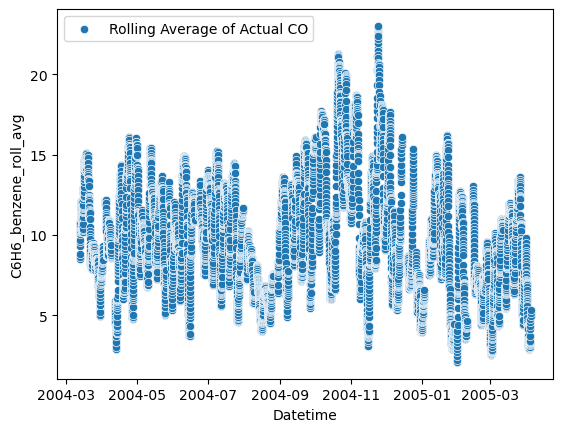

In [16]:
sns.scatterplot(data=X_df, x="Datetime", y="C6H6_benzene_roll_avg", label="Rolling Average of Actual CO")

<Axes: xlabel='Datetime', ylabel='C6H6_benzene'>

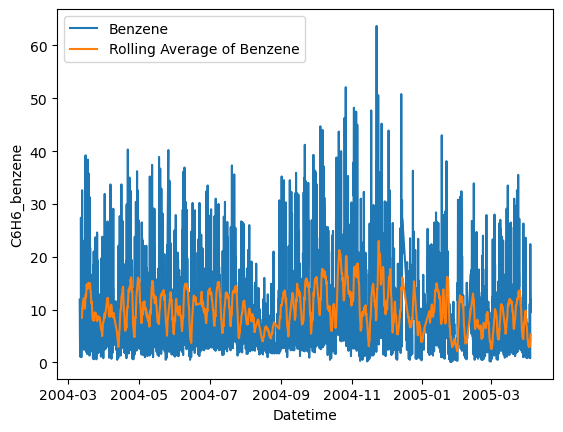

In [17]:
sns.lineplot(data=X_df, x="Datetime", y="C6H6_benzene", label="Benzene")
sns.lineplot(data=X_df, x="Datetime", y="C6H6_benzene_roll_avg", label="Rolling Average of Benzene")

<Axes: xlabel='Datetime', ylabel='CO'>

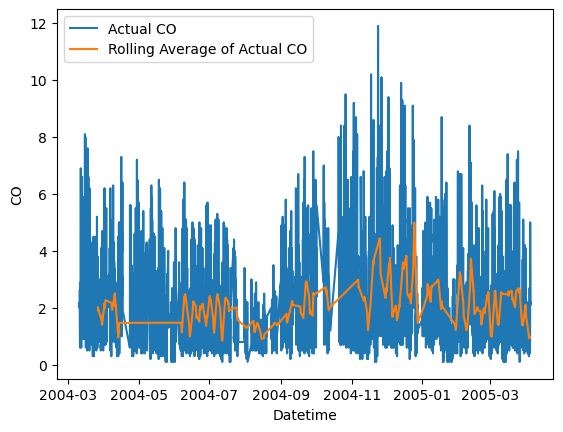

In [18]:
sns.lineplot(data=X_df, x="Datetime", y="CO", label="Actual CO")
sns.lineplot(data=X_df, x="Datetime", y="CO_roll_avg", label="Rolling Average of Actual CO")

<Axes: xlabel='Datetime', ylabel='CO_exp'>

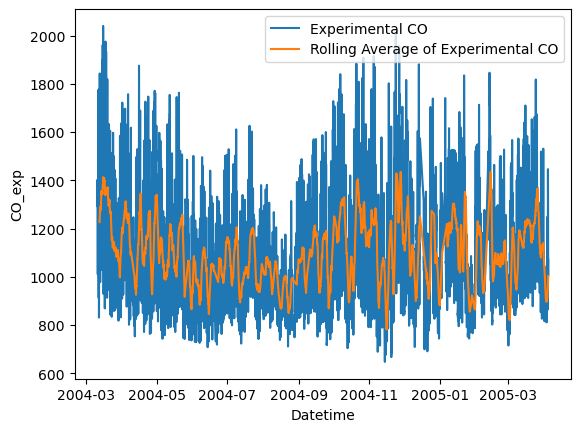

In [19]:
sns.lineplot(data=X_df, x="Datetime", y="CO_exp", label="Experimental CO")
sns.lineplot(data=X_df, x="Datetime", y="CO_exp_roll_avg", label="Rolling Average of Experimental CO")

<Axes: xlabel='Datetime', ylabel='NMHC'>

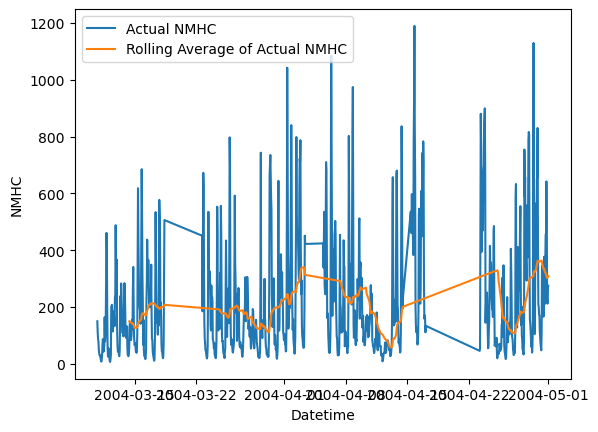

In [20]:
# NOTE: Only a couple weeks of data for actual NMHC

sns.lineplot(data=X_df, x="Datetime", y="NMHC", label="Actual NMHC")
sns.lineplot(data=X_df, x="Datetime", y="NMHC_roll_avg", label="Rolling Average of Actual NMHC")

<Axes: xlabel='Datetime', ylabel='NMHC_exp'>

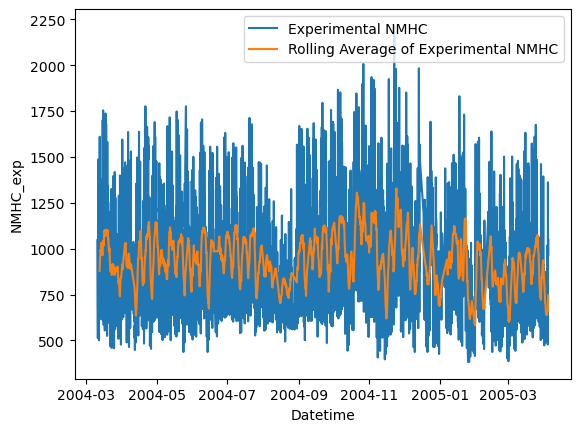

In [21]:
sns.lineplot(data=X_df, x="Datetime", y="NMHC_exp", label="Experimental NMHC")
sns.lineplot(data=X_df, x="Datetime", y="NMHC_exp_roll_avg", label="Rolling Average of Experimental NMHC")

<Axes: xlabel='Datetime', ylabel='NOx'>

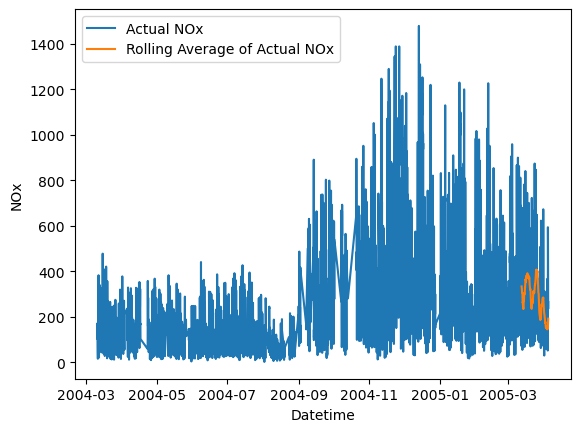

In [22]:
# Lots of missing data if there are only enough datapoints in sequence for a rolling average right at the end

sns.lineplot(data=X_df, x="Datetime", y="NOx", label="Actual NOx")
sns.lineplot(data=X_df, x="Datetime", y="NOx_roll_avg", label="Rolling Average of Actual NOx")

<Axes: xlabel='Datetime', ylabel='NOx_exp'>

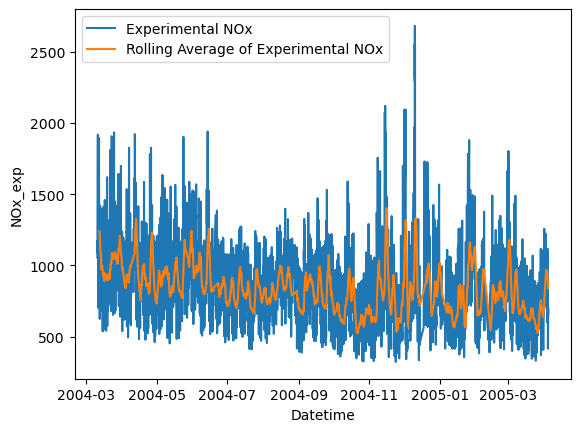

In [23]:
sns.lineplot(data=X_df, x="Datetime", y="NOx_exp", label="Experimental NOx")
sns.lineplot(data=X_df, x="Datetime", y="NOx_exp_roll_avg", label="Rolling Average of Experimental NOx")

<Axes: xlabel='Datetime', ylabel='NO2'>

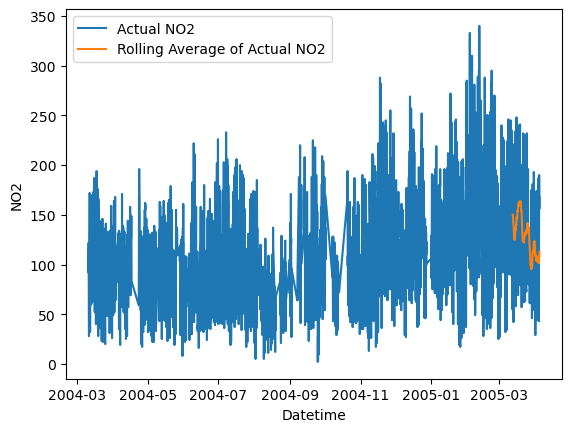

In [24]:
# Again a lot of missingness

sns.lineplot(data=X_df, x="Datetime", y="NO2", label="Actual NO2")
sns.lineplot(data=X_df, x="Datetime", y="NO2_roll_avg", label="Rolling Average of Actual NO2")

<Axes: xlabel='Datetime', ylabel='NO2_exp'>

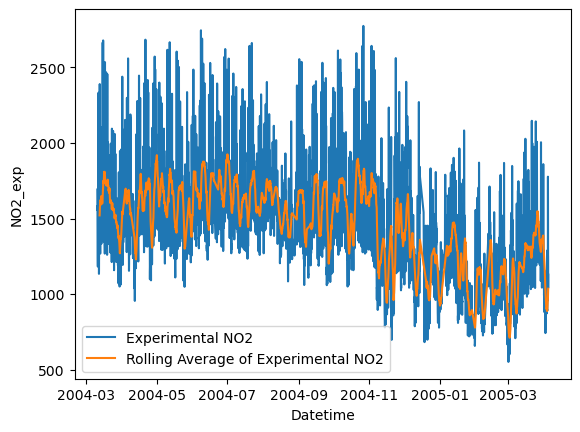

In [25]:
sns.lineplot(data=X_df, x="Datetime", y="NO2_exp", label="Experimental NO2")
sns.lineplot(data=X_df, x="Datetime", y="NO2_exp_roll_avg", label="Rolling Average of Experimental NO2")

<Axes: xlabel='Datetime', ylabel='O3_exp'>

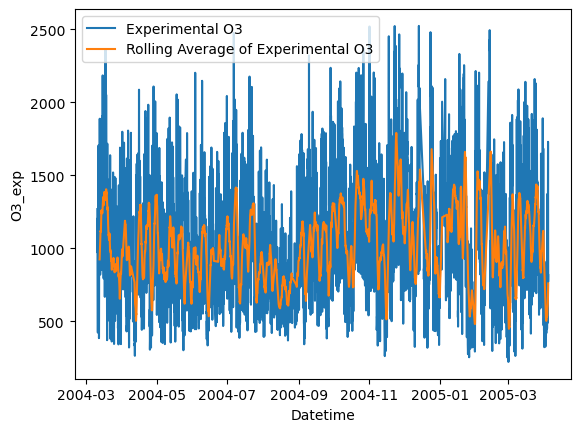

In [26]:
sns.lineplot(data=X_df, x="Datetime", y="O3_exp", label="Experimental O3")
sns.lineplot(data=X_df, x="Datetime", y="O3_exp_roll_avg", label="Rolling Average of Experimental O3")

<Axes: xlabel='Datetime', ylabel='T'>

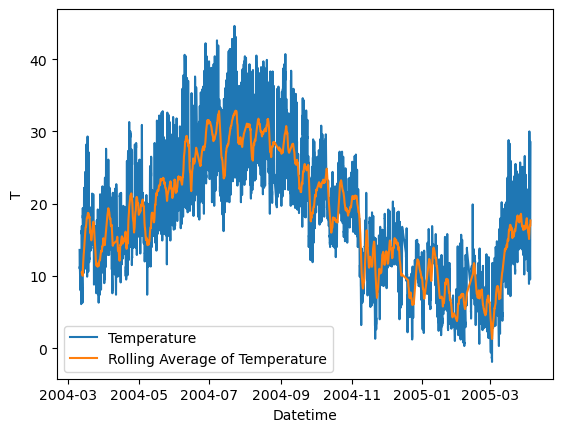

In [27]:
sns.lineplot(data=X_df, x="Datetime", y="T", label="Temperature")
sns.lineplot(data=X_df, x="Datetime", y="T_roll_avg", label="Rolling Average of Temperature")

<Axes: xlabel='Datetime', ylabel='RH'>

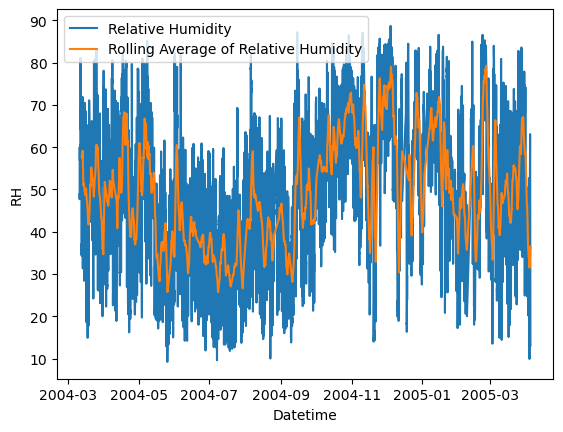

In [28]:
sns.lineplot(data=X_df, x="Datetime", y="RH", label="Relative Humidity")
sns.lineplot(data=X_df, x="Datetime", y="RH_roll_avg", label="Rolling Average of Relative Humidity")

<Axes: xlabel='Datetime', ylabel='AH'>

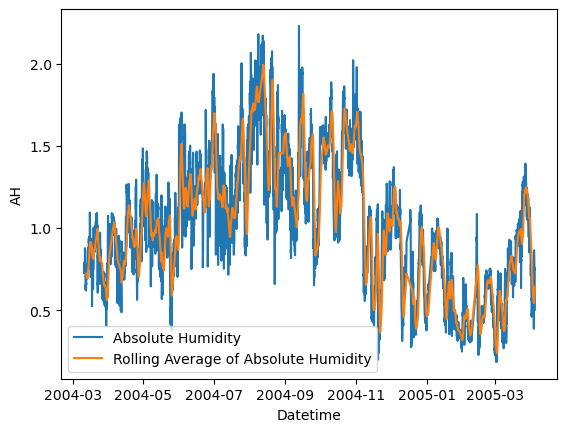

In [29]:
# Interesting how much less variation there is in absolute humidity

sns.lineplot(data=X_df, x="Datetime", y="AH", label="Absolute Humidity")
sns.lineplot(data=X_df, x="Datetime", y="AH_roll_avg", label="Rolling Average of Absolute Humidity")